# Path Finding for Java

This notebook demonstrates different ways on how path finding algorithms can be utilized for code analysis. 

Path algorithms in Graphs are famous for e.g. finding the fastest way from one place to another. How can these be applied to static code analysis and how can the results be interpreted?

One promising algorithm is [All Pairs Shortest Path](https://neo4j.com/docs/graph-data-science/current/algorithms/all-pairs-shortest-path). It shows dependencies from a different perspective and provides an overview on how directly or indirectly dependencies are connected to each other. The longest shortest path has an additional meaning: It is also known as the [**Graph Diameter**](https://mathworld.wolfram.com/GraphDiameter.html) and is very useful as a metric for the complexity of the Graph (or Subgraphs). The longest path (for directed acyclic graphs) can uncover the longest existing (worst case) dependency chains as long as there are no cycles in the Graph.

<br>

### References
- [jqassistant](https://jqassistant.org)
- [Neo4j Python Driver](https://neo4j.com/docs/api/python-driver/current)
- [All Pairs Shortest Path](https://neo4j.com/docs/graph-data-science/current/algorithms/all-pairs-shortest-path)
- [Longest Path for DAG (neo4j)](https://neo4j.com/docs/graph-data-science/current/algorithms/dag/longest-path)
- [Graph Diameter](https://mathworld.wolfram.com/GraphDiameter.html)

## What GPT-4 has to say about it

### All pairs shortest path

Interpreting the results of the "all pairs shortest path" algorithm on a graph of statically analyzed code modules and their dependencies involves understanding the structure and implications of the paths between nodes (modules) in the graph. Here are some specific steps and insights to consider:

1. **Graph Structure**: Each node represents a code module, and edges indicate dependencies. A directed edge from module A to module B implies that A depends on B.

2. **Shortest Paths**: The results will give you the shortest path lengths between all pairs of modules. This helps identify:
  - **Direct Dependencies**: A length of 1 indicates a direct dependency.
  - **Transitive Dependencies**: A length greater than 1 shows indirect dependencies. For example, if the path from A to C is 2, it could mean A → B → C, indicating A indirectly depends on C via B.

3. **Module Isolation**: If a module has very long paths to others, it might be more isolated. This could signal potential issues in the code structure, suggesting that module might be overly complex or decoupled from the rest of the system.

4. **Critical Paths**: Identify the shortest paths that connect key modules (e.g., core functionalities). These paths can highlight the most crucial dependencies that, if modified, might have extensive impacts on the system.

5. **Cycle Detection**: If any pairs have paths that loop back to themselves with a length not equal to 0, it indicates a cycle. Cycles can complicate dependency management, potentially leading to recursive dependencies, which can be problematic in terms of maintainability.

6. **Refactoring Opportunities**: By examining the lengths of paths, you might identify modules that could benefit from refactoring to decrease dependency complexity. For example, a module that has dependencies on many others (with longer path lengths) might be a candidate for breaking into smaller, more manageable components.

7. **Performance Considerations**: In large systems, long paths could impact performance. If certain modules are far from frequently accessed modules, consider whether they can be optimized for speed.

8. **Visual Representation**: Creating a visual representation of the graph with the shortest paths highlighted can be immensely helpful. Tools like Graphviz or D3.js can illustrate these relationships clearly, aiding in your analysis.

By focusing on these aspects, you can glean actionable insights from the results of the all pairs shortest path algorithm in the context of your statically analyzed code modules and their dependencies.

### Graph diameter (shortest longest path)

The longest shortest path in a dependency graph (often referred to in graph theory as the "diameter" of the graph) represents the maximum distance (in terms of the number of edges or dependencies) between any two nodes (modules) in the graph. Here’s how you can interpret this metric in the context of statically analyzed code modules and their dependencies:

1. **Network Complexity**: The longest shortest path indicates the overall complexity of the network of dependencies. A longer path suggests a more complicated interrelationship among modules. For example, a longest shortest path of 6 could indicate that there is at least one pair of modules in your system that rely on a chain of 6 other modules to communicate or function together.

2. **Potential Bottlenecks**: If the longest shortest path is significant, it may suggest potential bottlenecks in your architecture. For instance, if a core module at the beginning of a long path is slow or error-prone, it could affect numerous other modules dependent on it, resulting in systemic performance issues.

3. **Critical Communication Points**: The endpoints of the longest shortest path can be seen as critical communication points within your codebase. Understanding these connections can help identify which modules should be prioritized for testing and monitoring, especially during changes.

4. **Isolation and Coupling**: A long longest shortest path might indicate that some modules are isolated and far removed from others, which can suggest low cohesion. This can be a sign that the architecture might benefit from refactoring to reduce unnecessary dependencies or to improve modularity.

5. **Refactoring Opportunities**: If the longest shortest path is disproportionately long, it may highlight areas in the codebase where modules are too tightly coupled. This situation presents an opportunity for refactoring to create more independent modules or components that can interact with fewer dependencies.

6. **Impact of Changes**: Modules that lie along or are endpoints of the longest shortest paths are likely to have a significant impact on the overall system. Changes to them should be approached with caution and accompanied by rigorous testing.

7. **Cycle Detection**: In some cases, a long shortest path can indicate the presence of cycles in the graph. If there are paths that seem to loop back on themselves, it suggests potential design flaws that could lead to recursion or infinite loops, complicating maintenance.

8. **Architectural Decisions**: The longest shortest path can inform architectural decisions by providing insights into which dependencies might need to be revised or eliminated. For instance, if certain modules are consistently part of the longest path, it could justify investing resources in redesigning their interactions.

In summary, interpreting the longest shortest path provides a comprehensive view of the interdependencies among modules in your system, focusing on complexity, potential bottlenecks, and opportunities for improvement in architecture and design.

### Longest path

1. **Complex Dependencies**: Longest paths indicate modules that have extensive dependencies before reaching another module. For instance, if you find a path like A → B → C → D with a length of 4, it highlights a complex chain of dependencies. This can suggest that changes in module A might have far-reaching implications across the system.

2. **Potential Bottlenecks**: Modules located at the beginning of long paths could be performance bottlenecks. If a frequently used module is several layers deep in dependencies (e.g., A → B → C), it may slow down the entire system. Optimizing or refactoring these modules could improve performance.

3. **Maintenance Challenges**: Long paths may indicate parts of the code that are difficult to maintain or understand. For example, if module A requires multiple intermediary modules (B, C, D) for its functionality, developers may struggle to trace how changes propagate, leading to potential bugs.

4. **Risk of Change**: A module with a long dependency path can be more risky to modify. If A has dependencies on several modules down the line (e.g., A → B → C → D → E), any changes to A could inadvertently affect E, which might be critical or sensitive. This insight can help prioritize testing and reviews around such modules.

5. **Decoupling Opportunities**: Identifying the longest paths can highlight areas where you might want to break up dependencies. If there’s a long chain that could be simplified (e.g., by creating intermediary modules or interfaces), it may lead to a more modular and maintainable architecture.

6. **Redundancy**: Long paths may also reveal redundancy in dependencies. For instance, if multiple modules depend on a series of others (A → B → C → D and A → B → E), it could indicate unnecessary coupling that can be streamlined.

7. **System Understanding**: Long paths can help map out the architecture of your codebase. Understanding which modules are pivotal in long chains can provide insights into the overall design and help inform architectural decisions.

8. **Documentation & Knowledge Transfer**: If certain modules consistently appear in the longest paths, they may require better documentation. Ensuring that their roles and the reasons for their lengthy dependencies are well understood can facilitate knowledge transfer among team members.

By focusing on the longest paths in your dependency graph, you can uncover areas requiring attention for optimization, maintenance, and improved system architecture.

In [1]:
import os
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plot
import typing as typ
import numpy as np
from neo4j import GraphDatabase

In [2]:
#The following cell uses the build-in %html "magic" to override the CSS style for tables to a much smaller size.
#This is especially needed for PDF export of tables with multiple columns.

In [3]:
%%html
<style>
/* CSS style for smaller dataframe tables. */
.dataframe th {
    font-size: 8px;
}
.dataframe td {
    font-size: 8px;
}
</style>

In [4]:
# Main Colormap
main_color_map = 'nipy_spectral'

In [5]:
# Pandas DataFrame Display Configuration
pd.set_option('display.max_colwidth', 300)

In [6]:
# Please set the environment variable "NEO4J_INITIAL_PASSWORD" in your shell 
# before starting jupyter notebook to provide the password for the user "neo4j". 
# It is not recommended to hardcode the password into jupyter notebook for security reasons.

driver = GraphDatabase.driver(uri="bolt://localhost:7687", auth=("neo4j", os.environ.get("NEO4J_INITIAL_PASSWORD")))
driver.verify_connectivity()

In [7]:
def get_cypher_query_from_file(filename):
    with open(filename) as file:
        return ' '.join(file.readlines())

In [8]:
def query_cypher_to_data_frame(filename, parameters_: typ.Optional[typ.Dict[str, typ.Any]] = None):
    records, summary, keys = driver.execute_query(get_cypher_query_from_file(filename),parameters_=parameters_)
    return pd.DataFrame([r.values() for r in records], columns=keys)

In [9]:
def create_directed_unweighted_projection(parameters: dict) -> bool: 
    """
    Creates an directed homogenous unweighted in-memory Graph projection for/with Neo4j Graph Data Science Plugin.
    It returns True if there is data available for the given parameter and False otherwise.
    Parameters
    ----------
    dependencies_projection : str
        The name prefix for the in-memory projection for dependencies. Example: "java-package-path-finding-notebook"
    dependencies_projection_node : str
        The label of the nodes that will be used for the projection. Example: "Package"
    dependencies_projection_weight_property : str
        The name of the node property that contains the dependency weight. Example: "weight25PercentInterfaces"
    dependencies_projection_embedding_dimension : str
        The number of the dimensions and therefore size of the resulting array of floating point numbers
    """
    
    is_data_missing=query_cypher_to_data_frame("../cypher/Dependencies_Projection/Dependencies_0_Check_Projectable.cypher", parameters).empty
    if is_data_missing: return False

    query_cypher_to_data_frame("../cypher/Dependencies_Projection/Dependencies_1_Delete_Projection.cypher", parameters)
    query_cypher_to_data_frame("../cypher/Dependencies_Projection/Dependencies_2_Delete_Subgraph.cypher", parameters)
    # To exclude the direction of the relationships use the following line to create the projection:
    # query_cypher_to_data_frame("../cypher/Dependencies_Projection/Dependencies_4_Create_Undirected_Projection.cypher", parameters)
    query_cypher_to_data_frame("../cypher/Dependencies_Projection/Dependencies_3_Create_Projection.cypher", parameters)
    query_cypher_to_data_frame("../cypher/Dependencies_Projection/Dependencies_5_Create_Subgraph.cypher", parameters)
    return True

In [10]:
def empty_projection_result() -> pd.DataFrame:
    """
    Creates an empty result and is meant to be used in case there is no data for the projection.
    """
    
    print("No projected data for path finding available")
    return pd.DataFrame(columns=['totalCost', 'sourceProject', 'isDifferentTargetProject', 'distance', 'distanceTotalPairCount', 'distanceTotalSourceCount', 'distanceTotalTargetCount', 'nodeCount', 'pairCount'])

In [11]:
def query_if_data_available(is_data_available: bool, cypher_file_name: str, parameters: dict) -> pd.DataFrame: 
    """
    Runs the cypher query in the file given as cypherFileName with the given parameters if the data is available,
    or returns an empty result if the projection failed due to missing data.
    
    is_data_available
    ----------
    Pass the returned boolean from the projection creation here. Will return an empty result if false and otherwise execute the query.

    cypher_file_name
    ----------
    Name of the file containing the Cypher query that executes node embeddings procedure.

    parameters
    ----------
    dependencies_projection : str
        The name prefix for the in-memory projection for dependencies. Example: "java-package-path-finding-notebook"
    dependencies_projection_node : str
        The label of the nodes that will be used for the projection. Example: "Package"
    dependencies_projection_weight_property : str
        The name of the node property that contains the dependency weight. Example: "weight25PercentInterfaces"
    """
    
    return query_cypher_to_data_frame(cypher_file_name, parameters) if is_data_available else empty_projection_result()

In [12]:
def get_total_distance_distribution(data_frame: pd.DataFrame) -> pd.DataFrame:
    """
    Returns the DataFrame only containing the overall/total distances, their pair count and the count of the distinct source and target nodes
    
    data_frame
    ----------
    Contains the path algorithm result including the columns "distance", "distanceTotalPairCount", "distanceTotalSourceCount" and "distanceTotalTargetCount"
    """
    
    return data_frame[['distance', 'distanceTotalPairCount', 'distanceTotalSourceCount', 'distanceTotalTargetCount']].drop_duplicates().reset_index()

In [13]:
def get_longest_path_for_column(column : str, data_frame: pd.DataFrame) -> pd.DataFrame:
    """
    Returns the DataFrame grouped by the source Typescript scan (with one ore more projects) containing their max/longest distance.
    
    column
    ----------
    Name of the column to group by. Example: "sourceProject".
    
    data_frame
    ----------
    Contains the path algorithm result including the columns "distance" and "sourceScan"
    """
    
    return data_frame.groupby(column)['distance'].max().sort_values(ascending=False)

In [14]:
def get_distance_distribution_for_each(column : str, data_frame: pd.DataFrame) -> pd.DataFrame:
    """
    Returns the transposed pivot of the DataFrame grouped by the given column.
    
    column
    ----------
    Name of the column to group by. Example: "sourceProject".
    
    data_frame
    ----------
    Contains the path algorithm result including the columns "distance", "pairCount" and the chosen column parameter.
    """

    data_frame = data_frame.copy()

    # Rows contain the source project (e.g. Java artifact or Typescript project) and its the pair count.
    # The columns contain the distances.
    data_frame = data_frame.pivot(index='distance', columns=column, values='pairCount')

    # Sort by column sum and then take only the first 40 columns
    sum_of_pair_count = data_frame.sum()
    data_frame = data_frame[sum_of_pair_count.sort_values(ascending=False).index[:40]]

    # Fill missing values with zeroes
    data_frame = data_frame.fillna(0)

    # Transpose the table (flip columns and rows) to have a row for every source project
    data_frame = data_frame.transpose()

    return data_frame

In [15]:
def normalize_distance_distribution_for_each_row(data_frame: pd.DataFrame) -> pd.DataFrame:
    """
    Returns the normalized data in percentage of the DataFrame for each source project
    
    data_frame
    ----------
    Pivot dataframe with source projects in rows, distances in columns and pair count values
    """
    return data_frame.div(data_frame.sum(axis=1), axis=0) * 100

In [16]:
def plot_total_distances_bar_chart(data_frame: pd.DataFrame, title: str, ylabel: str):
    """
    Plots the total number of pairs for each distance.
    
    data_frame
    ----------
    Contains the path algorithm result including the columns "distance" and "distanceTotalPairCount"

    title
    ----------
    Title of the plot. Example: "All pairs shortest path for Java package dependencies in total (bar)"

    ylabel
    ----------
    Y-axis label. Example: "total number of Java package pairs"
    """
    
    if data_frame.empty:
        print("No data to plot '" + title + "'")
    else:
        data_frame.plot(
            title=title,
            kind='bar', 
            grid=True,
            x='distance',
            y='distanceTotalPairCount',
            xlabel='path length',
            ylabel=ylabel,
            figsize=(9,7),
            legend=False,
            fontsize=8,
            cmap=main_color_map
        )

In [17]:
def plot_total_distances_pie_chart(data_frame: pd.DataFrame, title: str, ylabel: str):
    """
    Plots the total number of pairs for each distance.
    
    data_frame
    ----------
    Contains the path algorithm result including the columns "distance" and "distanceTotalPairCount"

    title
    ----------
    Title of the plot. Example: "All pairs shortest path for Java package dependencies in total (pie)".

    ylabel
    ----------
    Y-axis label. Example: "Total number of Java package pairs"
    """

    if data_frame.empty:
        print("No data to plot '" + title + "'")
    else:
        explode_all=np.full(data_frame.shape[0], 0.01)
        total_number_of_pairs=data_frame['distanceTotalPairCount'].sum()
        def custom_auto_percentage_format(percentage):
            return '{:1.2f}% ({:.0f})'.format(percentage, total_number_of_pairs*percentage/100)

        plot.figure();
        data_frame.plot(
            title=title, 
            kind='pie', 
            labels=data_frame['distance'],
            y='distanceTotalPairCount', 
            ylabel=ylabel,
            legend=True,
            labeldistance=None,
            autopct=custom_auto_percentage_format,
            explode=explode_all,
            textprops={'fontsize': 8},
            pctdistance=1.2,
            figsize=(8,8),
            cmap=main_color_map
        )
        plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='path length')
        plot.show()

In [18]:
def plot_longest_distance_for_each_row(data_frame: pd.DataFrame, title: str, xlabel: str, ylabel: str):
    """
    Plots the longest distance per source project 
    
    data_frame
    ----------
    Contains the path algorithm result pivot table including the columns "distance"

    title
    ----------
    Title of the plot. Example: 'Longest shortest path ("diameter") for Java package dependencies per artifact'

    xlabel
    ----------
    X-axis label. Example: "Artifact".
    
    ylabel
    ----------
    Y-axis label. Example: "Java package pairs".    
    """

    if data_frame.empty:
        print("No data to plot '" + title + "'")
    else:
        plot.figure();
        axes = data_frame.transpose().plot(
            title=title, 
            kind='bar', 
            grid=True,
            xlabel=xlabel,
            ylabel=ylabel,
            figsize=(10,6),
            legend=False,
            cmap=main_color_map
        )
        plot.show()

In [19]:
def plot_stacked_distances_for_each_row(data_frame: pd.DataFrame, title: str, xlabel: str, ylabel: str, logy: bool = False):
    """
    Plots each source project (e.g. Java artifact or Typescript project) stacked by distance (number of dependency pairs)
    
    data_frame
    ----------
    Contains the output of "get_distance_distribution_for_each" with e.g. the 
    source projects as rows, distances as columns and number of pairs as values.

    title
    ----------
    Title of the plot. Example: "Longest shortest path ("diameter") for Java packages ".

    xlabel
    ----------
    X-axis label. Example: "Artifact".
    
    ylabel
    ----------
    Y-axis label. Example: "Java package pairs".
    """

    if data_frame.empty:
        print("No data to plot '" + title + "'")
    else:
        plot.figure();
        axes = data_frame.plot(
            title=title, 
            kind='bar', 
            grid=True,
            stacked=True,
            logy=logy,
            xlabel=xlabel,
            ylabel=ylabel,
            figsize=(10,6),
            legend=True,
            cmap=main_color_map
        ).legend(bbox_to_anchor=(1.0, 1.0), title="path length")
        plot.show()

## 1. Java Packages

## 1.1 All pairs shortest path

Use "[All Pairs Shortest Path](https://neo4j.com/docs/graph-data-science/current/algorithms/all-pairs-shortest-path)" algorithm to get the shortest path distance between all pairs of dependent Java packages. It shows how many Packages have a direct dependency (distance 1), how many are reachable with one dependency in between (distance 2), and so on...

### 1.1.1 Create a projection of all Java package dependencies

Creates a in-memory projection of "Java:Package" nodes and their "DEPENDS_ON" relationships as a preparation to run the Graph algorithms. The weight property is not used for now (September 2024) but may be needed for other algorithms/variants some time.

In [20]:
package_path_finding_parameters={
    "dependencies_projection": "java-package-path-finding-notebook",
    "dependencies_projection_node": "Package",
    "dependencies_projection_weight_property": "weight25PercentInterfaces",
}

In [21]:
# Create the directed and unweighted projection with the parameters defined directly above
is_package_data_available=create_directed_unweighted_projection(package_path_finding_parameters)

#### Projected Graph statistics for Java package dependencies

In [22]:
print("Projection data available: " + str(is_package_data_available))
package_projection_statistics=query_cypher_to_data_frame("../cypher/Dependencies_Projection/Dependencies_12_Get_Projection_Statistics.cypher", package_path_finding_parameters)
package_projection_statistics

Projection data available: True


,nodeCount,relationshipCount,density,sizeInBytes,degreeDistribution.min,degreeDistribution.mean,degreeDistribution.max,degreeDistribution.p50,degreeDistribution.p75,degreeDistribution.p90,degreeDistribution.p95,degreeDistribution.p99,degreeDistribution.p999
0,116,760,0.056972,2925257,0,6.551724,58,5,8,14,16,45,58


### 1.1.2 All pairs shortest path in total

First, we'll have a look at the overall/total result of the all pairs shortest path algorithm for all dependencies.

In [23]:
# Execute algorithm "All pairs shortest path" and query overall and artifact specific results
all_pairs_shortest_paths_distribution_per_artifact=query_if_data_available(is_package_data_available, "../cypher/Path_Finding/Path_Finding_5_All_pairs_shortest_path_distribution_per_project.cypher", package_path_finding_parameters)

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownRelationshipTypeWarning} {category: UNRECOGNIZED} {title: The provided relationship type is not in the database.} {description: One of the relationship types in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing relationship type is: CONTAINS_PROJECT)} {position: line: 31, column: 39, offset: 1603} for query: "// Path Finding - All pairs shortest path algorithm - Stream - Per project\n \n   CALL gds.allShortestPaths.stream($dependencies_projection + '-cleaned')\n  YIELD sourceNodeId, targetNodeId, distance\n // Filter out all pairs that have no connection (infinite distance)\n  WHERE gds.util.isFinite(distance) = true\n   WITH toInteger(distance) AS distance\n       ,sourceNodeId\n       ,targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dep

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownPropertyKeyWarning} {category: UNRECOGNIZED} {title: The provided property key is not in the database} {description: One of the property names in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing property name is: rootProjectName)} {position: line: 38, column: 42, offset: 2086} for query: "// Path Finding - All pairs shortest path algorithm - Stream - Per project\n \n   CALL gds.allShortestPaths.stream($dependencies_projection + '-cleaned')\n  YIELD sourceNodeId, targetNodeId, distance\n // Filter out all pairs that have no connection (infinite distance)\n  WHERE gds.util.isFinite(distance) = true\n   WITH toInteger(distance) AS distance\n       ,sourceNodeId\n       ,targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownPropertyKeyWarning} {category: UNRECOGNIZED} {title: The provided property key is not in the database} {description: One of the property names in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing property name is: rootProjectName)} {position: line: 38, column: 16, offset: 2060} for query: "// Path Finding - All pairs shortest path algorithm - Stream - Per project\n \n   CALL gds.allShortestPaths.stream($dependencies_projection + '-cleaned')\n  YIELD sourceNodeId, targetNodeId, distance\n // Filter out all pairs that have no connection (infinite distance)\n  WHERE gds.util.isFinite(distance) = true\n   WITH toInteger(distance) AS distance\n       ,sourceNodeId\n       ,targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownPropertyKeyWarning} {category: UNRECOGNIZED} {title: The provided property key is not in the database} {description: One of the property names in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing property name is: rootProjectName)} {position: line: 35, column: 15, offset: 1865} for query: "// Path Finding - All pairs shortest path algorithm - Stream - Per project\n \n   CALL gds.allShortestPaths.stream($dependencies_projection + '-cleaned')\n  YIELD sourceNodeId, targetNodeId, distance\n // Filter out all pairs that have no connection (infinite distance)\n  WHERE gds.util.isFinite(distance) = true\n   WITH toInteger(distance) AS distance\n       ,sourceNodeId\n       ,targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownRelationshipTypeWarning} {category: UNRECOGNIZED} {title: The provided relationship type is not in the database.} {description: One of the relationship types in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing relationship type is: CONTAINS_PROJECT)} {position: line: 30, column: 39, offset: 1530} for query: "// Path Finding - All pairs shortest path algorithm - Stream - Per project\n \n   CALL gds.allShortestPaths.stream($dependencies_projection + '-cleaned')\n  YIELD sourceNodeId, targetNodeId, distance\n // Filter out all pairs that have no connection (infinite distance)\n  WHERE gds.util.isFinite(distance) = true\n   WITH toInteger(distance) AS distance\n       ,sourceNodeId\n       ,targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dep

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.AggregationSkippedNull} {category: UNRECOGNIZED} {title: The query contains an aggregation function that skips null values.} {description: null value eliminated in set function.} {position: None} for query: "// Path Finding - All pairs shortest path algorithm - Stream - Per project\n \n   CALL gds.allShortestPaths.stream($dependencies_projection + '-cleaned')\n  YIELD sourceNodeId, targetNodeId, distance\n // Filter out all pairs that have no connection (infinite distance)\n  WHERE gds.util.isFinite(distance) = true\n   WITH toInteger(distance) AS distance\n       ,sourceNodeId\n       ,targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group by distance to get the overall distribution\n   WITH distance\n       ,count(*)                     AS distanceTotalPairCount\n       ,count(DISTINCT sourceNodeId) AS distanceTotalSourceCount\n       ,count(DI

#### All pairs shortest path in total - Longest shortest path (Graph Diameter)

In [24]:
package_dependencies_graph_diameter=all_pairs_shortest_paths_distribution_per_artifact['distance'].max()
print('The diameter (longest shortest path) of the projected package dependencies Graph is:', package_dependencies_graph_diameter)

The diameter (longest shortest path) of the projected package dependencies Graph is: 5


#### All pairs shortest path in total - Path count per length - Table

In [25]:
all_pairs_shortest_paths_distribution_per_artifact_in_total=get_total_distance_distribution(all_pairs_shortest_paths_distribution_per_artifact)
all_pairs_shortest_paths_distribution_per_artifact_in_total.head(50)

,index,distance,distanceTotalPairCount,distanceTotalSourceCount,distanceTotalTargetCount
0,0,1,760,110,103
1,1,2,1593,101,88
2,4,3,1146,97,60
3,5,4,204,61,21
4,18,5,7,3,5


#### All pairs shortest path in total - Path count per length - Bar chart

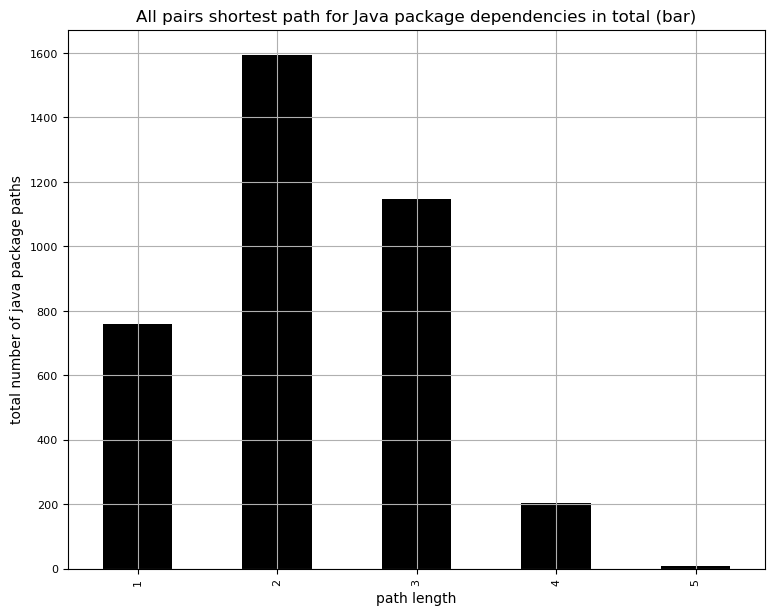

In [26]:
plot_total_distances_bar_chart(
    data_frame=all_pairs_shortest_paths_distribution_per_artifact_in_total, 
    title='All pairs shortest path for Java package dependencies in total (bar)',
    ylabel='total number of java package paths'
)

#### All pairs shortest path in total - Path count per length - Pie chart

<Figure size 640x480 with 0 Axes>

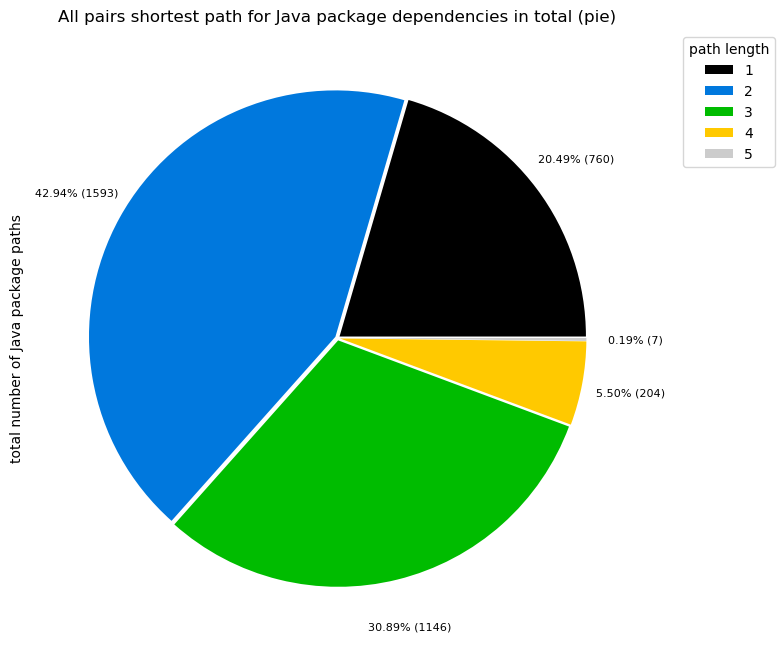

In [27]:
plot_total_distances_pie_chart(
    data_frame=all_pairs_shortest_paths_distribution_per_artifact_in_total,
    title='All pairs shortest path for Java package dependencies in total (pie)',
    ylabel='total number of Java package paths'
)

### 1.1.3 All pairs shortest path in detail

The following table shows the first 10 rows with all details of the query above. It contains the results of the "all pairs shortest path" algorithm including the artifact the source node belong to and if the target node is the same or not. The main intuition here is to show how the data is structured. It provides the basis for tables and charts shown in following sections below, that filter and group the data accordingly.

In [28]:
all_pairs_shortest_paths_distribution_per_artifact.head(10)

,sourceProject,sourceScan,sourceRootProject,isDifferentTargetProject,isDifferentTargetScan,isDifferentTargetRootProject,distance,distanceTotalPairCount,distanceTotalSourceCount,distanceTotalTargetCount,pairCount,sourceNodeCount,targetNodeCount,examples,exampleProjects,exampleScans
0,axon-configuration-4.11.0,None,None,True,None,None,1,760,110,103,45,1,45,"[/org/axonframework/config -> /org/axonframework/disruptor/commandhandling, /org/axonframework/config -> /org/axonframework/modelling/command, /org/axonframework/config -> /org/axonframework/modelling/command/inspection, /org/axonframework/config -> /org/axonframework/modelling/saga]","[axon-configuration-4.11.0 -> axon-disruptor-4.11.0, axon-configuration-4.11.0 -> axon-modelling-4.11.0, axon-configuration-4.11.0 -> axon-eventsourcing-4.11.0, axon-configuration-4.11.0 -> axon-messaging-4.11.0]",[]
1,axon-configuration-4.11.0,None,None,True,None,None,2,1593,101,88,10,1,10,"[/org/axonframework/config -> /org/axonframework/modelling/saga/metamodel, /org/axonframework/config -> /org/axonframework/eventsourcing/conflictresolution, /org/axonframework/config -> /org/axonframework/commandhandling/callbacks, /org/axonframework/config -> /org/axonframework/common/io]","[axon-configuration-4.11.0 -> axon-modelling-4.11.0, axon-configuration-4.11.0 -> axon-eventsourcing-4.11.0, axon-configuration-4.11.0 -> axon-messaging-4.11.0]",[]
2,axon-disruptor-4.11.0,None,None,True,None,None,1,760,110,103,13,1,13,"[/org/axonframework/disruptor/commandhandling -> /org/axonframework/modelling/command, /org/axonframework/disruptor/commandhandling -> /org/axonframework/modelling/command/inspection, /org/axonframework/disruptor/commandhandling -> /org/axonframework/eventsourcing, /org/axonframework/disruptor/c...","[axon-disruptor-4.11.0 -> axon-modelling-4.11.0, axon-disruptor-4.11.0 -> axon-eventsourcing-4.11.0, axon-disruptor-4.11.0 -> axon-messaging-4.11.0]",[]
3,axon-disruptor-4.11.0,None,None,True,None,None,2,1593,101,88,18,1,18,"[/org/axonframework/disruptor/commandhandling -> /org/axonframework/eventsourcing/conflictresolution, /org/axonframework/disruptor/commandhandling -> /org/axonframework/eventsourcing/snapshotting, /org/axonframework/disruptor/commandhandling -> /org/axonframework/common/annotation, /org/axonfram...","[axon-disruptor-4.11.0 -> axon-eventsourcing-4.11.0, axon-disruptor-4.11.0 -> axon-messaging-4.11.0]",[]
4,axon-disruptor-4.11.0,None,None,True,None,None,3,1146,97,60,6,1,6,"[/org/axonframework/disruptor/commandhandling -> /org/axonframework/eventhandling/async, /org/axonframework/disruptor/commandhandling -> /org/axonframework/eventhandling/replay, /org/axonframework/disruptor/commandhandling -> /org/axonframework/eventhandling/tokenstore, /org/axonframework/disrup...",[axon-disruptor-4.11.0 -> axon-messaging-4.11.0],[]
5,axon-disruptor-4.11.0,None,None,True,None,None,4,204,61,21,2,1,2,"[/org/axonframework/disruptor/commandhandling -> /org/axonframework/messaging/responsetypes, /org/axonframework/disruptor/commandhandling -> /org/axonframework/queryhandling/registration]",[axon-disruptor-4.11.0 -> axon-messaging-4.11.0],[]
6,axon-eventsourcing-4.11.0,None,None,False,None,None,1,760,110,103,15,8,7,"[/org/axonframework/eventsourcing/eventstore -> /org/axonframework/eventsourcing, /org/axonframework/eventsourcing -> /org/axonframework/eventsourcing/conflictresolution, /org/axonframework/eventsourcing -> /org/axonframework/eventsourcing/eventstore, /org/axonframework/eventsourcing/conflictres...",[axon-eventsourcing-4.11.0 -> axon-eventsourcing-4.11.0],[]
7,axon-eventsourcing-4.11.0,None,None,False,None,None,2,1593,101,88,11,8,4,"[/org/axonframework/eventsourcing/conflictresolution -> /org/axonframework/eventsourcing, /org/axonframework/eventsourcing/eventstore/inmemory -> /org/axonframework/eventsourcing, /org/axonframework/eventsourcing/eventstore/jdbc -> /org/axonframework/eventsourcing, /org/axonframework/eventsourci...",[axon-eventsourcing-4.11.0 -> axon-eventsourcing-4.11

### 1.1.4 All pairs shortest path for each artifact

In this section we'll focus only on pairs of nodes that both belong to the same artifact, filtering out every line that has `isDifferentTargetProject==False`. The first ten rows are shown in a table followed by charts that show the distribution of shortest path distances across different artifacts in stacked bar charts (absolute and normalized).

**Note:** It is possible that a (shortest) path could have nodes in between that belong to different artifacts. Therefore, the data of each artifact isn't perfectly isolated. However, it shows how the dependencies interact across artifacts "in real life" while still providing a decent isolation of each artifact.

In [29]:
all_pairs_shortest_paths_distribution_per_artifact_isolated=all_pairs_shortest_paths_distribution_per_artifact.query('isDifferentTargetProject == False')
all_pairs_shortest_paths_distribution_per_artifact_isolated.head(10)

,sourceProject,sourceScan,sourceRootProject,isDifferentTargetProject,isDifferentTargetScan,isDifferentTargetRootProject,distance,distanceTotalPairCount,distanceTotalSourceCount,distanceTotalTargetCount,pairCount,sourceNodeCount,targetNodeCount,examples,exampleProjects,exampleScans
6,axon-eventsourcing-4.11.0,None,None,False,None,None,1,760,110,103,15,8,7,"[/org/axonframework/eventsourcing/eventstore -> /org/axonframework/eventsourcing, /org/axonframework/eventsourcing -> /org/axonframework/eventsourcing/conflictresolution, /org/axonframework/eventsourcing -> /org/axonframework/eventsourcing/eventstore, /org/axonframework/eventsourcing/conflictres...",[axon-eventsourcing-4.11.0 -> axon-eventsourcing-4.11.0],[]
7,axon-eventsourcing-4.11.0,None,None,False,None,None,2,1593,101,88,11,8,4,"[/org/axonframework/eventsourcing/conflictresolution -> /org/axonframework/eventsourcing, /org/axonframework/eventsourcing/eventstore/inmemory -> /org/axonframework/eventsourcing, /org/axonframework/eventsourcing/eventstore/jdbc -> /org/axonframework/eventsourcing, /org/axonframework/eventsourci...",[axon-eventsourcing-4.11.0 -> axon-eventsourcing-4.11.0],[]
8,axon-eventsourcing-4.11.0,None,None,False,None,None,3,1146,97,60,5,5,2,"[/org/axonframework/eventsourcing/eventstore/jdbc/statements -> /org/axonframework/eventsourcing, /org/axonframework/eventsourcing/eventstore/inmemory -> /org/axonframework/eventsourcing/conflictresolution, /org/axonframework/eventsourcing/eventstore/jdbc -> /org/axonframework/eventsourcing/conf...",[axon-eventsourcing-4.11.0 -> axon-eventsourcing-4.11.0],[]
9,axon-eventsourcing-4.11.0,None,None,False,None,None,4,204,61,21,1,1,1,[/org/axonframework/eventsourcing/eventstore/jdbc/statements -> /org/axonframework/eventsourcing/conflictresolution],[axon-eventsourcing-4.11.0 -> axon-eventsourcing-4.11.0],[]
14,axon-messaging-4.11.0,None,None,False,None,None,1,760,110,103,311,61,41,"[/org/axonframework/messaging/timeout -> /org/axonframework/commandhandling, /org/axonframework/serialization -> /org/axonframework/commandhandling, /org/axonframework/tracing -> /org/axonframework/commandhandling, /org/axonframework/tracing/attributes -> /org/axonframework/commandhandling]",[axon-messaging-4.11.0 -> axon-messaging-4.11.0],[]
15,axon-messaging-4.11.0,None,None,False,None,None,2,1593,101,88,586,53,30,"[/org/axonframework/eventhandling/deadletter/jdbc -> /org/axonframework/commandhandling, /org/axonframework/eventhandling/deadletter/jpa -> /org/axonframework/commandhandling, /org/axonframework/eventhandling/deadletter/legacyjpa -> /org/axonframework/commandhandling, /org/axonframework/eventhan...",[axon-messaging-4.11.0 -> axon-messaging-4.11.0],[]
16,axon-messaging-4.11.0,None,None,False,None,None,3,1146,97,60,469,53,26,"[/org/axonframework/eventhandling/async -> /org/axonframework/commandhandling, /org/axonframework/eventhandling/deadletter -> /org/axonframework/commandhandling, /org/axonframework/eventhandling/interceptors -> /org/axonframework/commandhandling, /org/axonframework/eventhandling/gateway -> /org/...",[axon-messaging-4.11.0 -> axon-messaging-4.11.0],[]
17,axon-messaging-4.11.0,None,None,False,None,None,4,204,61,21,128,33,18,"[/org/axonframework/lifecycle -> /org/axonframework/commandhandling, /org/axonframework/eventhandling/async -> /org/axonframework/commandhandling/callbacks, /org/axonframework/eventhandling/deadletter -> /org/axonframework/commandhandling/callbacks, /org/axonframework/eventhandling/interceptors ...",[axon-messaging-4.11.0 -> axon-messaging-4.11.0],[]
18,axon-messaging-4.11.0,None,None,False,None,None,5,7,3,5,7,3,5,"[/org/axonframework/lifecycle -> /org/axonframework/commandhandling/callbacks, /org/axonframework/lifecycle -> /org/axonframework/messaging/responsetypes, /org/axonframework/lifecycle -> /org/axonframework/queryhandling/registration, /org/axonframework/commandhandling/callbacks -> /org/axonframe...",[axon-messaging-4.11.0 -> axon-messaging-4.11.0],[]
19,axon-modelling-4.11.0,None,None,F

#### All pairs shortest path for each artifact - Longest shortest path (Diameter) for each artifact

Shows the top 20 artifacts with the longest shortest path (=Graph Diameter).

In [30]:
graph_diameter_per_artifact = get_longest_path_for_column('sourceProject', all_pairs_shortest_paths_distribution_per_artifact_isolated)
graph_diameter_per_artifact.head(20)

sourceProject
axon-messaging-4.11.0                    5
axon-eventsourcing-4.11.0                4
axon-server-connector-4.11.0             3
axon-spring-boot-autoconfigure-4.11.0    3
axon-modelling-4.11.0                    2
axon-test-4.11.0                         1
Name: distance, dtype: int64

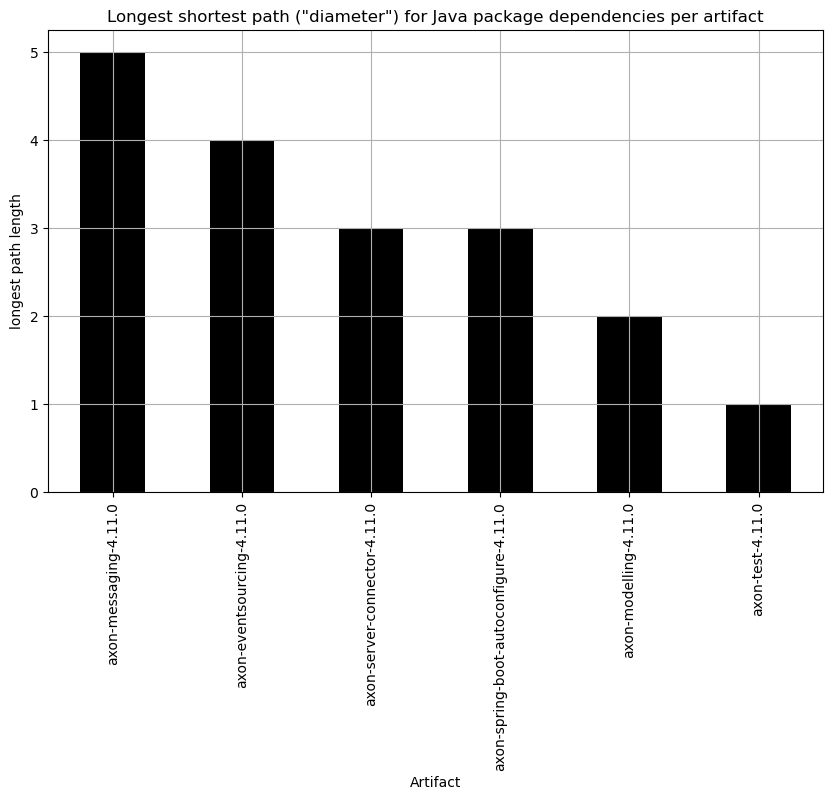

In [31]:
plot_longest_distance_for_each_row(
    data_frame=graph_diameter_per_artifact,
    title='Longest shortest path ("diameter") for Java package dependencies per artifact',
    xlabel='Artifact',
    ylabel='longest path length'
)

#### All pairs shortest path for each artifact - Bar chart (absolute)

In [32]:
all_pairs_shortest_paths_distribution_per_artifact_isolated_pivot = get_distance_distribution_for_each('sourceProject', all_pairs_shortest_paths_distribution_per_artifact_isolated)

<Figure size 640x480 with 0 Axes>

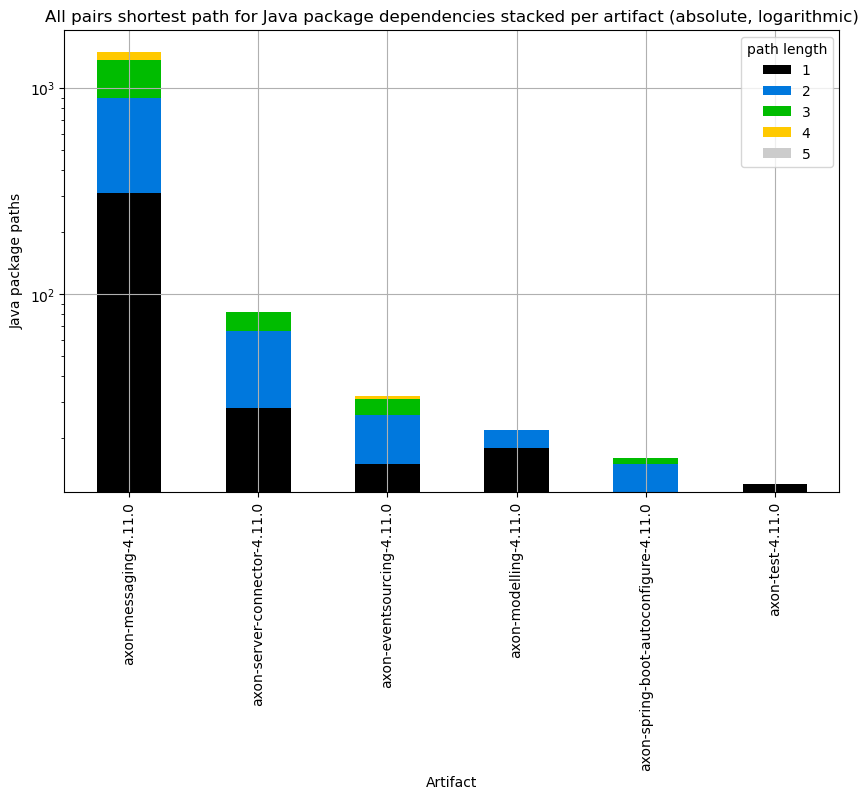

In [33]:
plot_stacked_distances_for_each_row(
    data_frame=all_pairs_shortest_paths_distribution_per_artifact_isolated_pivot,
    title='All pairs shortest path for Java package dependencies stacked per artifact (absolute, logarithmic)',
    xlabel='Artifact',
    ylabel='Java package paths',
    logy=True
)

#### All pairs shortest path for each artifact - Bar chart (normalized)

Shows the top 50 artifacts with the highest number of dependency paths stacked by their length.

In [34]:
# Normalize data (percent of sum pairs)
all_pairs_shortest_paths_distribution_per_artifact_isolated_normalized_pivot=normalize_distance_distribution_for_each_row(all_pairs_shortest_paths_distribution_per_artifact_isolated_pivot)
all_pairs_shortest_paths_distribution_per_artifact_isolated_normalized_pivot.head(50)

distance,1,2,3,4,5
sourceProject,,,,,
axon-messaging-4.11.0,20.719520,39.040640,31.245836,8.527648,0.466356
axon-server-connector-4.11.0,34.146341,46.341463,19.512195,0.000000,0.000000
axon-eventsourcing-4.11.0,46.875000,34.375000,15.625000,3.125000,0.000000
axon-modelling-4.11.0,81.818182,18.181818,0.000000,0.000000,0.000000
axon-spring-boot-autoconfigure-4.11.0,68.750000,25.000000,6.250000,0.000000,0.000000
axon-test-4.11.0,100.000000,0.000000,0.000000,0.000000,0.000000


<Figure size 640x480 with 0 Axes>

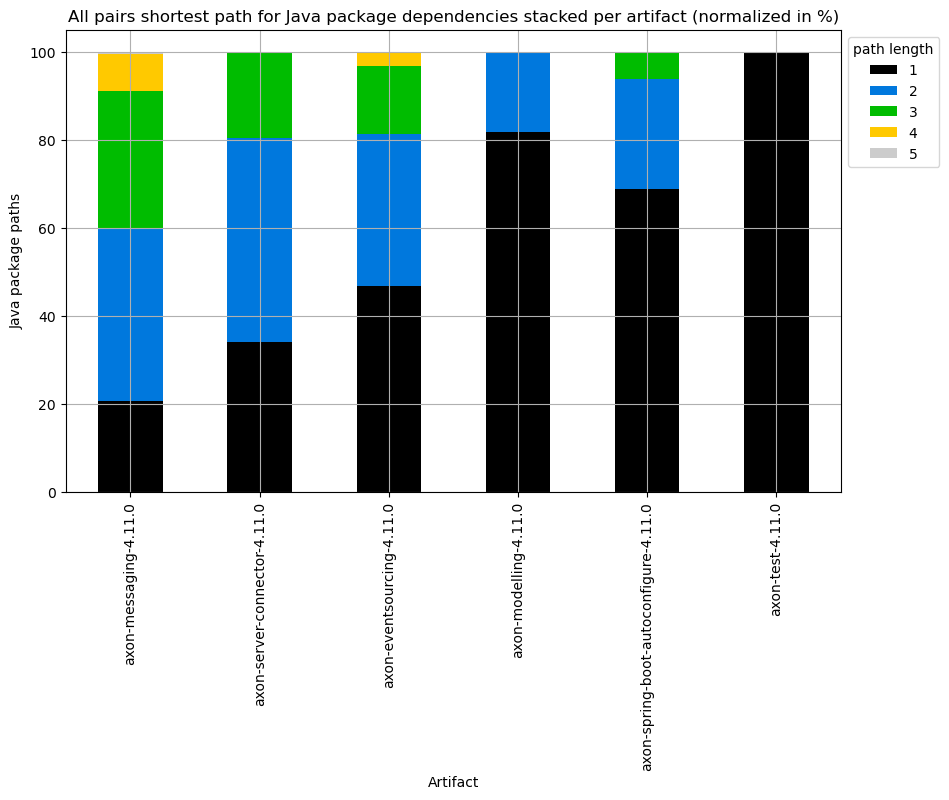

In [35]:
plot_stacked_distances_for_each_row(
    data_frame=all_pairs_shortest_paths_distribution_per_artifact_isolated_normalized_pivot.head(50),
    title='All pairs shortest path for Java package dependencies stacked per artifact (normalized in %)',
    xlabel='Artifact',
    ylabel='Java package paths'
)

## 1.2 Longest path

Use [Longest Path](https://neo4j.com/docs/graph-data-science/current/algorithms/dag/longest-path) algorithm to get the longest paths between Java packages. It is typically higher than the longest shortest path (diameter) and helps together with it to get a good overview of the complexity.

**Note:** This algorithm requires a Directed Acyclic Graph (DAG) and will lead to inaccurate results when the Graph contains cycles.

### 1.2.1 Longest path in total

First, we'll have a look at the overall/total result of the longest path algorithm for all dependencies.

In [36]:
# Execute algorithm "longest path (for directed acyclic graphs)" and query overall and artifact specific results
longest_paths_distribution_per_artifact=query_if_data_available(is_package_data_available, "../cypher/Path_Finding/Path_Finding_6_Longest_paths_distribution_per_project.cypher", package_path_finding_parameters)

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownPropertyKeyWarning} {category: UNRECOGNIZED} {title: The provided property key is not in the database} {description: One of the property names in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing property name is: rootProjectName)} {position: line: 36, column: 42, offset: 2007} for query: "// Longest paths distribution\n \n   CALL gds.dag.longestPath.stream($dependencies_projection + '-cleaned')\n  YIELD index, sourceNode, targetNode, totalCost//, nodeIds, costs, path\n   WITH toInteger(totalCost) AS distance\n       ,sourceNode           AS sourceNodeId\n       ,targetNode           AS targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group by distance to get the overall distribution\n   WITH distance\n       ,count(*)   

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownPropertyKeyWarning} {category: UNRECOGNIZED} {title: The provided property key is not in the database} {description: One of the property names in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing property name is: rootProjectName)} {position: line: 36, column: 16, offset: 1981} for query: "// Longest paths distribution\n \n   CALL gds.dag.longestPath.stream($dependencies_projection + '-cleaned')\n  YIELD index, sourceNode, targetNode, totalCost//, nodeIds, costs, path\n   WITH toInteger(totalCost) AS distance\n       ,sourceNode           AS sourceNodeId\n       ,targetNode           AS targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group by distance to get the overall distribution\n   WITH distance\n       ,count(*)   

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownRelationshipTypeWarning} {category: UNRECOGNIZED} {title: The provided relationship type is not in the database.} {description: One of the relationship types in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing relationship type is: CONTAINS_PROJECT)} {position: line: 29, column: 39, offset: 1524} for query: "// Longest paths distribution\n \n   CALL gds.dag.longestPath.stream($dependencies_projection + '-cleaned')\n  YIELD index, sourceNode, targetNode, totalCost//, nodeIds, costs, path\n   WITH toInteger(totalCost) AS distance\n       ,sourceNode           AS sourceNodeId\n       ,targetNode           AS targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group by distance to get the overall distribution\n   WITH distance\

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownPropertyKeyWarning} {category: UNRECOGNIZED} {title: The provided property key is not in the database} {description: One of the property names in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing property name is: rootProjectName)} {position: line: 33, column: 15, offset: 1786} for query: "// Longest paths distribution\n \n   CALL gds.dag.longestPath.stream($dependencies_projection + '-cleaned')\n  YIELD index, sourceNode, targetNode, totalCost//, nodeIds, costs, path\n   WITH toInteger(totalCost) AS distance\n       ,sourceNode           AS sourceNodeId\n       ,targetNode           AS targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group by distance to get the overall distribution\n   WITH distance\n       ,count(*)   

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownRelationshipTypeWarning} {category: UNRECOGNIZED} {title: The provided relationship type is not in the database.} {description: One of the relationship types in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing relationship type is: CONTAINS_PROJECT)} {position: line: 28, column: 39, offset: 1451} for query: "// Longest paths distribution\n \n   CALL gds.dag.longestPath.stream($dependencies_projection + '-cleaned')\n  YIELD index, sourceNode, targetNode, totalCost//, nodeIds, costs, path\n   WITH toInteger(totalCost) AS distance\n       ,sourceNode           AS sourceNodeId\n       ,targetNode           AS targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group by distance to get the overall distribution\n   WITH distance\

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.AggregationSkippedNull} {category: UNRECOGNIZED} {title: The query contains an aggregation function that skips null values.} {description: null value eliminated in set function.} {position: None} for query: "// Longest paths distribution\n \n   CALL gds.dag.longestPath.stream($dependencies_projection + '-cleaned')\n  YIELD index, sourceNode, targetNode, totalCost//, nodeIds, costs, path\n   WITH toInteger(totalCost) AS distance\n       ,sourceNode           AS sourceNodeId\n       ,targetNode           AS targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group by distance to get the overall distribution\n   WITH distance\n       ,count(*)                     AS distanceTotalPairCount\n       ,count(DISTINCT sourceNodeId) AS distanceTotalSourceCount\n       ,count(DISTINCT targetNodeId) AS distanceTotalTargetCount\n       ,collect({sourceNodeId: so

#### Longest path in total - Max longest path

In [37]:
package_dependencies_max_longest_path=longest_paths_distribution_per_artifact['distance'].max()
print('The max. longest path of the projected package dependencies is:', package_dependencies_max_longest_path)

The max. longest path of the projected package dependencies is: 5


#### Longest path in total - Paths per length - Table

In [38]:
# First, display only the overall/total distances, their pair count and the count of the distinct source and target nodes
longest_paths_distribution_per_artifact_in_total=get_total_distance_distribution(longest_paths_distribution_per_artifact)
longest_paths_distribution_per_artifact_in_total.head(50)

,index,distance,distanceTotalPairCount,distanceTotalSourceCount,distanceTotalTargetCount
0,0,1,13,5,13
1,2,2,40,3,40
2,5,3,15,2,15
3,9,4,7,1,7
4,10,5,8,1,8


#### Longest path in total - Path count per length - Bar chart

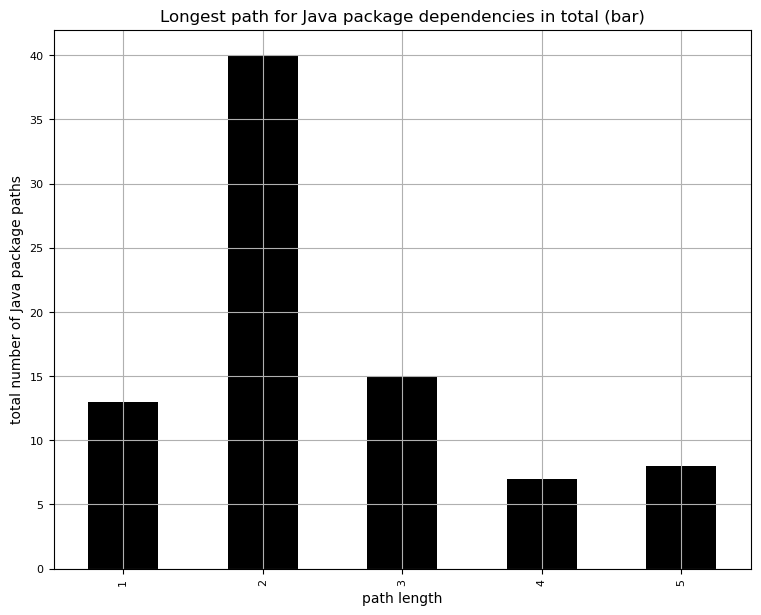

In [39]:
plot_total_distances_bar_chart(
    data_frame=longest_paths_distribution_per_artifact_in_total, 
    title='Longest path for Java package dependencies in total (bar)',
    ylabel='total number of Java package paths'
)

#### Longest path in total - Path count per length - Pie chart

<Figure size 640x480 with 0 Axes>

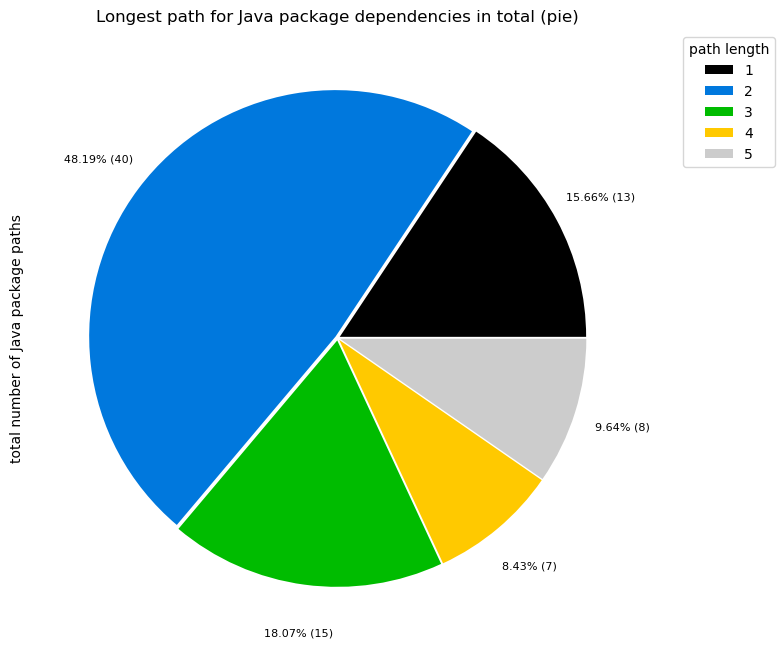

In [40]:
plot_total_distances_pie_chart(
    data_frame=longest_paths_distribution_per_artifact_in_total,
    title='Longest path for Java package dependencies in total (pie)',
    ylabel='total number of Java package paths'
)

### 1.2.2 Longest path in detail

The following table shows the first 10 rows with all details of the query above. It contains the results of the "longest path" algorithm including the artifact the source node belongs to and if the target node is in the same artifact or not. The main intuition is to show how the data is structured. It provides the basis for tables and charts shown in following sections below, that filter and group the data accordingly.

In [41]:
longest_paths_distribution_per_artifact.head(10)

,sourceProject,sourceScan,sourceRootProject,isDifferentTargetProject,isDifferentTargetScan,isDifferentTargetRootProject,distance,distanceTotalPairCount,distanceTotalSourceCount,distanceTotalTargetCount,pairCount,sourceNodeCount,targetNodeCount,examples,exampleProjects,exampleScans
0,axon-modelling-4.11.0,None,None,True,None,None,1,13,5,13,1,1,1,[/org/axonframework/modelling/command/legacyjpa -> /org/axonframework/common/lock],[axon-modelling-4.11.0 -> axon-messaging-4.11.0],[]
1,axon-server-connector-4.11.0,None,None,False,None,None,1,13,5,13,1,1,1,[/org/axonframework/axonserver/connector/heartbeat/connection/checker -> /org/axonframework/axonserver/connector/heartbeat],[axon-server-connector-4.11.0 -> axon-server-connector-4.11.0],[]
2,axon-server-connector-4.11.0,None,None,False,None,None,2,40,3,40,1,1,1,[/org/axonframework/axonserver/connector/heartbeat/connection/checker -> /org/axonframework/axonserver/connector/util],[axon-server-connector-4.11.0 -> axon-server-connector-4.11.0],[]
3,axon-spring-boot-autoconfigure-4.11.0,None,None,False,None,None,1,13,5,13,2,1,2,"[/org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/springboot/autoconfig, /org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/springboot/util/legacyjpa]",[axon-spring-boot-autoconfigure-4.11.0 -> axon-spring-boot-autoconfigure-4.11.0],[]
4,axon-spring-boot-autoconfigure-4.11.0,None,None,False,None,None,2,40,3,40,4,1,4,"[/org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/actuator/axonserver, /org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/springboot/service/connection, /org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/springboot/util, /org/ax...",[axon-spring-boot-autoconfigure-4.11.0 -> axon-spring-boot-autoconfigure-4.11.0],[]
5,axon-spring-boot-autoconfigure-4.11.0,None,None,False,None,None,3,15,2,15,2,1,2,"[/org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/actuator, /org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/springboot]",[axon-spring-boot-autoconfigure-4.11.0 -> axon-spring-boot-autoconfigure-4.11.0],[]
6,axon-spring-boot-autoconfigure-4.11.0,None,None,True,None,None,1,13,5,13,4,1,4,"[/org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/modelling/saga/repository/legacyjpa, /org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/eventsourcing/eventstore/legacyjpa, /org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/eve...","[axon-spring-boot-autoconfigure-4.11.0 -> axon-modelling-4.11.0, axon-spring-boot-autoconfigure-4.11.0 -> axon-eventsourcing-4.11.0, axon-spring-boot-autoconfigure-4.11.0 -> axon-messaging-4.11.0]",[]
7,axon-spring-boot-autoconfigure-4.11.0,None,None,True,None,None,2,40,3,40,34,1,34,"[/org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/tracing/opentelemetry, /org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/modelling/command, /org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/modelling/saga/repository/jdbc, /o...","[axon-spring-boot-autoconfigure-4.11.0 -> axon-tracing-opentelemetry-4.11.0, axon-spring-boot-autoconfigure-4.11.0 -> axon-modelling-4.11.0, axon-spring-boot-autoconfigure-4.11.0 -> axon-eventsourcing-4.11.0, axon-spring-boot-autoconfigure-4.11.0 -> axon-server-connector-4.11.0]",[]
8,axon-spring-boot-autoconfigure-4.11.0,None,None,True,None,None,3,15,2,15,12,1,12,"[/org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/modelling/saga, /org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/modelling/saga/repository, /org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/modelling/saga/repository/jpa, /o...","[axon-spring-boot-autoconfigure-4.11.0 -> axon-modelling-4.11.0, axon-spring-boot-autoconfigure-4.11.0 -> axon-server-connector-4.11.0, axon-spring-boot-autoconfigure-4.11.0 -> axon-mess

### 1.2.3 Longest path for each artifact

In this section we'll focus only on pairs of nodes that both belong to the same artifact, filtering out every line that has `isDifferentTargetProject==False`. The first ten rows are shown in a table followed by charts that show the distribution of longest path distances across different artifacts in stacked bar charts (absolute and normalized).

**Note:** It is possible that a (longest) path could have nodes in between that belong to different artifacts. Therefore, the data of each artifact isn't perfectly isolated. However, it shows how the dependencies interact across artifacts "in real life" while still providing a decent isolation of each artifact.

In [42]:
longest_paths_distribution_per_artifact_isolated=longest_paths_distribution_per_artifact.query('isDifferentTargetProject == False')
longest_paths_distribution_per_artifact_isolated.head(10)

,sourceProject,sourceScan,sourceRootProject,isDifferentTargetProject,isDifferentTargetScan,isDifferentTargetRootProject,distance,distanceTotalPairCount,distanceTotalSourceCount,distanceTotalTargetCount,pairCount,sourceNodeCount,targetNodeCount,examples,exampleProjects,exampleScans
1,axon-server-connector-4.11.0,None,None,False,None,None,1,13,5,13,1,1,1,[/org/axonframework/axonserver/connector/heartbeat/connection/checker -> /org/axonframework/axonserver/connector/heartbeat],[axon-server-connector-4.11.0 -> axon-server-connector-4.11.0],[]
2,axon-server-connector-4.11.0,None,None,False,None,None,2,40,3,40,1,1,1,[/org/axonframework/axonserver/connector/heartbeat/connection/checker -> /org/axonframework/axonserver/connector/util],[axon-server-connector-4.11.0 -> axon-server-connector-4.11.0],[]
3,axon-spring-boot-autoconfigure-4.11.0,None,None,False,None,None,1,13,5,13,2,1,2,"[/org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/springboot/autoconfig, /org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/springboot/util/legacyjpa]",[axon-spring-boot-autoconfigure-4.11.0 -> axon-spring-boot-autoconfigure-4.11.0],[]
4,axon-spring-boot-autoconfigure-4.11.0,None,None,False,None,None,2,40,3,40,4,1,4,"[/org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/actuator/axonserver, /org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/springboot/service/connection, /org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/springboot/util, /org/ax...",[axon-spring-boot-autoconfigure-4.11.0 -> axon-spring-boot-autoconfigure-4.11.0],[]
5,axon-spring-boot-autoconfigure-4.11.0,None,None,False,None,None,3,15,2,15,2,1,2,"[/org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/actuator, /org/axonframework/springboot/autoconfig/legacyjpa -> /org/axonframework/springboot]",[axon-spring-boot-autoconfigure-4.11.0 -> axon-spring-boot-autoconfigure-4.11.0],[]
11,axon-test-4.11.0,None,None,False,None,None,1,13,5,13,3,2,3,"[/org/axonframework/test/aggregate -> /org/axonframework/test/deadline, /org/axonframework/test/saga -> /org/axonframework/test/eventscheduler, /org/axonframework/test/saga -> /org/axonframework/test/utils]",[axon-test-4.11.0 -> axon-test-4.11.0],[]
12,axon-test-4.11.0,None,None,False,None,None,2,40,3,40,1,1,1,[/org/axonframework/test/aggregate -> /org/axonframework/test/matchers],[axon-test-4.11.0 -> axon-test-4.11.0],[]
13,axon-test-4.11.0,None,None,False,None,None,3,15,2,15,1,1,1,[/org/axonframework/test/aggregate -> /org/axonframework/test],[axon-test-4.11.0 -> axon-test-4.11.0],[]


#### Longest path for each artifact - Max. longest path for each artifact

Shows the top 20 artifacts with their max. longest path.

In [43]:
longest_path_per_artifact = get_longest_path_for_column('sourceProject', longest_paths_distribution_per_artifact_isolated)
longest_path_per_artifact.head(20)

sourceProject
axon-spring-boot-autoconfigure-4.11.0    3
axon-test-4.11.0                         3
axon-server-connector-4.11.0             2
Name: distance, dtype: int64

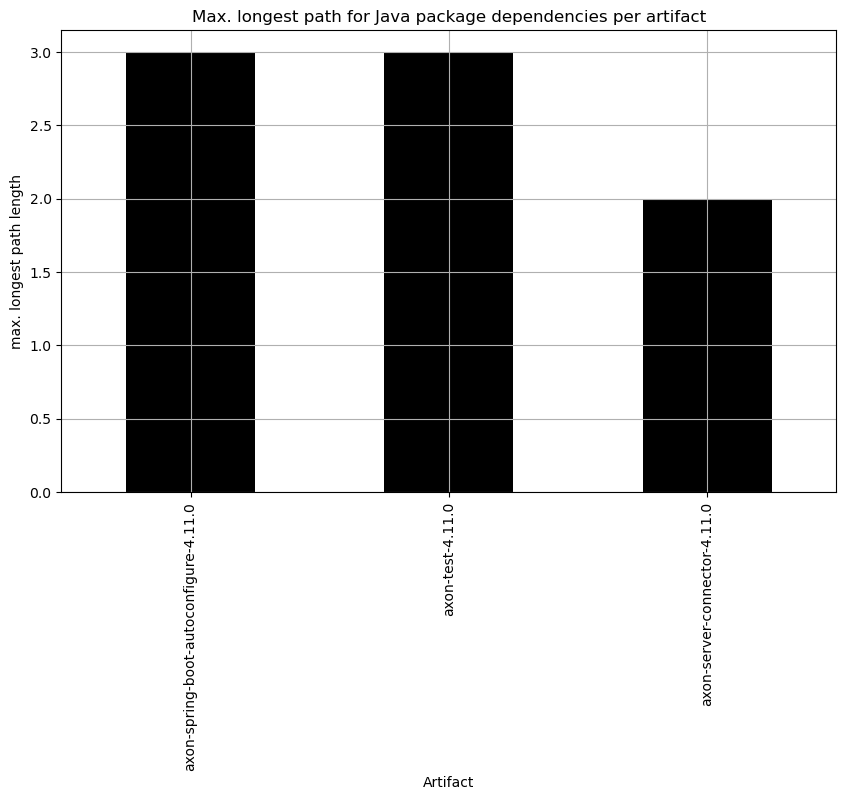

In [44]:
plot_longest_distance_for_each_row(
    data_frame=longest_path_per_artifact,
    title='Max. longest path for Java package dependencies per artifact',
    xlabel='Artifact',
    ylabel='max. longest path length'
)

#### Longest path for each artifact - Bar chart (absolute)

In [45]:
longest_paths_distribution_per_artifact_isolated_pivot = get_distance_distribution_for_each('sourceProject', longest_paths_distribution_per_artifact_isolated)

<Figure size 640x480 with 0 Axes>

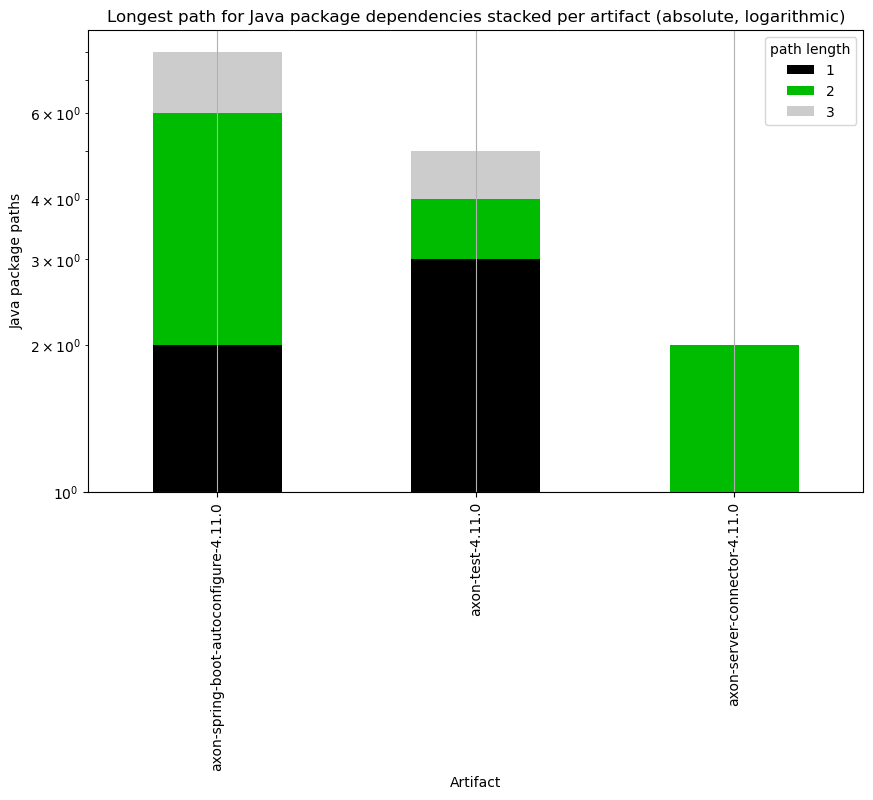

In [46]:
plot_stacked_distances_for_each_row(
    data_frame=longest_paths_distribution_per_artifact_isolated_pivot,
    title='Longest path for Java package dependencies stacked per artifact (absolute, logarithmic)',
    xlabel='Artifact',
    ylabel='Java package paths',
    logy=True
)

#### Longest path for each artifact - Bar chart (normalized)

Shows the top 50 artifacts with the highest number of dependency paths stacked by their length.

In [47]:
# Normalize data (percent of sum pairs)
longest_paths_distribution_per_artifact_isolated_normalized_pivot=normalize_distance_distribution_for_each_row(longest_paths_distribution_per_artifact_isolated_pivot)
longest_paths_distribution_per_artifact_isolated_normalized_pivot.head(50)

distance,1,2,3
sourceProject,,,
axon-spring-boot-autoconfigure-4.11.0,25.0,50.0,25.0
axon-test-4.11.0,60.0,20.0,20.0
axon-server-connector-4.11.0,50.0,50.0,0.0


<Figure size 640x480 with 0 Axes>

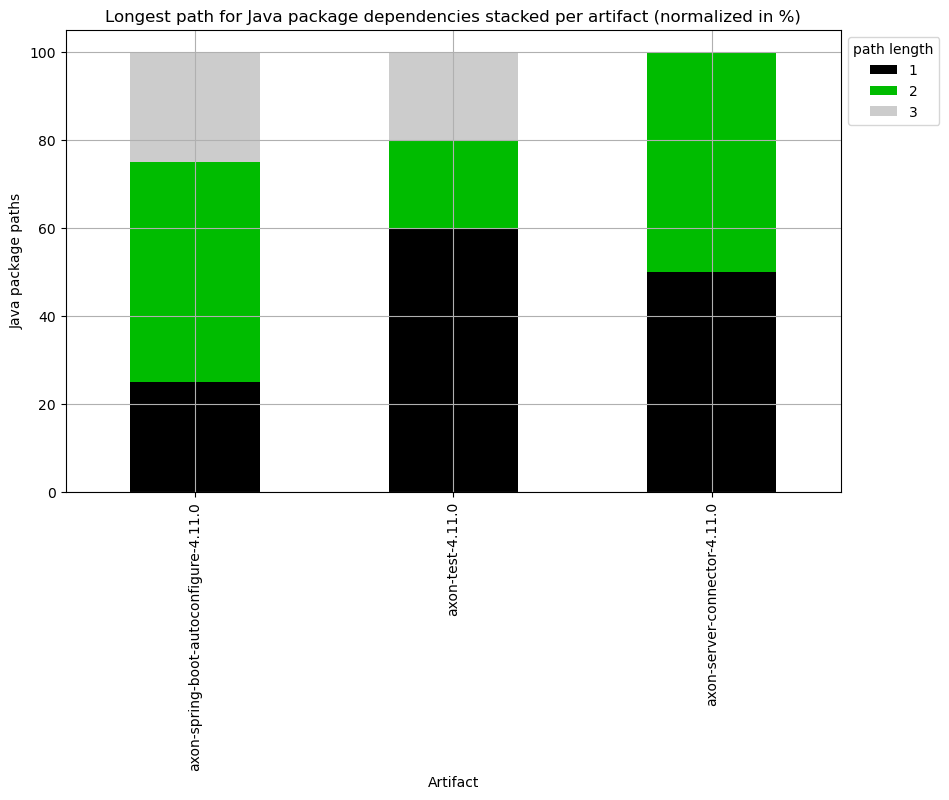

In [48]:
plot_stacked_distances_for_each_row(
    data_frame=longest_paths_distribution_per_artifact_isolated_normalized_pivot.head(50),
    title='Longest path for Java package dependencies stacked per artifact (normalized in %)',
    xlabel='Artifact',
    ylabel='Java package paths'
)

## 2. Java Artifacts

## 2.1 All pairs shortest path

Use [All Pairs Shortest Path](https://neo4j.com/docs/graph-data-science/current/algorithms/all-pairs-shortest-path) algorithm to get the shortest path distance between all pairs of dependent Java artifacts. It shows how many artifacts have a direct dependency (distance 1), how many are reachable with one dependency in between (distance 2), and so on...

### 2.1.1 Create a projection of all Java artifacts dependencies

Creates a in-memory projection of "Java:Artifact" nodes and their "DEPENDS_ON" relationships as a preparation to run the Graph algorithms. The weight property is not used for now (September 2024) but may be needed for other algorithms/variants some time.

In [49]:
artifact_path_finding_parameters={
    "dependencies_projection": "java-artifact-path-finding-notebook",
    "dependencies_projection_node": "Artifact",
    "dependencies_projection_weight_property": "weight",
}

In [50]:
# Create the directed and unweighted projection with the parameters defined directly above
is_artifact_data_available=create_directed_unweighted_projection(artifact_path_finding_parameters)

#### Projected Graph statistics for Java Artifact dependencies

In [51]:
artifact_projection_statistics=query_cypher_to_data_frame("../cypher/Dependencies_Projection/Dependencies_12_Get_Projection_Statistics.cypher", artifact_path_finding_parameters)
artifact_projection_statistics

,nodeCount,relationshipCount,density,sizeInBytes,degreeDistribution.min,degreeDistribution.mean,degreeDistribution.max,degreeDistribution.p50,degreeDistribution.p75,degreeDistribution.p90,degreeDistribution.p95,degreeDistribution.p99,degreeDistribution.p999
0,9,25,0.347222,2693291,0,2.777778,7,3,4,7,7,7,7


### 2.1.2 All pairs shortest path in total

First, we'll have a look at the overall/total result of the all pairs shortest path algorithm for all dependencies.

In [52]:
# Execute algorithm "All pairs shortest path" and query overall and artifact specific results
all_pairs_shortest_paths_distribution_for_artifacts=query_if_data_available(is_artifact_data_available, "../cypher/Path_Finding/Path_Finding_5_All_pairs_shortest_path_distribution_per_project.cypher", artifact_path_finding_parameters)

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownRelationshipTypeWarning} {category: UNRECOGNIZED} {title: The provided relationship type is not in the database.} {description: One of the relationship types in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing relationship type is: CONTAINS_PROJECT)} {position: line: 31, column: 39, offset: 1603} for query: "// Path Finding - All pairs shortest path algorithm - Stream - Per project\n \n   CALL gds.allShortestPaths.stream($dependencies_projection + '-cleaned')\n  YIELD sourceNodeId, targetNodeId, distance\n // Filter out all pairs that have no connection (infinite distance)\n  WHERE gds.util.isFinite(distance) = true\n   WITH toInteger(distance) AS distance\n       ,sourceNodeId\n       ,targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dep

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownPropertyKeyWarning} {category: UNRECOGNIZED} {title: The provided property key is not in the database} {description: One of the property names in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing property name is: rootProjectName)} {position: line: 38, column: 42, offset: 2086} for query: "// Path Finding - All pairs shortest path algorithm - Stream - Per project\n \n   CALL gds.allShortestPaths.stream($dependencies_projection + '-cleaned')\n  YIELD sourceNodeId, targetNodeId, distance\n // Filter out all pairs that have no connection (infinite distance)\n  WHERE gds.util.isFinite(distance) = true\n   WITH toInteger(distance) AS distance\n       ,sourceNodeId\n       ,targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownPropertyKeyWarning} {category: UNRECOGNIZED} {title: The provided property key is not in the database} {description: One of the property names in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing property name is: rootProjectName)} {position: line: 38, column: 16, offset: 2060} for query: "// Path Finding - All pairs shortest path algorithm - Stream - Per project\n \n   CALL gds.allShortestPaths.stream($dependencies_projection + '-cleaned')\n  YIELD sourceNodeId, targetNodeId, distance\n // Filter out all pairs that have no connection (infinite distance)\n  WHERE gds.util.isFinite(distance) = true\n   WITH toInteger(distance) AS distance\n       ,sourceNodeId\n       ,targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownPropertyKeyWarning} {category: UNRECOGNIZED} {title: The provided property key is not in the database} {description: One of the property names in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing property name is: rootProjectName)} {position: line: 35, column: 15, offset: 1865} for query: "// Path Finding - All pairs shortest path algorithm - Stream - Per project\n \n   CALL gds.allShortestPaths.stream($dependencies_projection + '-cleaned')\n  YIELD sourceNodeId, targetNodeId, distance\n // Filter out all pairs that have no connection (infinite distance)\n  WHERE gds.util.isFinite(distance) = true\n   WITH toInteger(distance) AS distance\n       ,sourceNodeId\n       ,targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownRelationshipTypeWarning} {category: UNRECOGNIZED} {title: The provided relationship type is not in the database.} {description: One of the relationship types in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing relationship type is: CONTAINS_PROJECT)} {position: line: 30, column: 39, offset: 1530} for query: "// Path Finding - All pairs shortest path algorithm - Stream - Per project\n \n   CALL gds.allShortestPaths.stream($dependencies_projection + '-cleaned')\n  YIELD sourceNodeId, targetNodeId, distance\n // Filter out all pairs that have no connection (infinite distance)\n  WHERE gds.util.isFinite(distance) = true\n   WITH toInteger(distance) AS distance\n       ,sourceNodeId\n       ,targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dep

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.AggregationSkippedNull} {category: UNRECOGNIZED} {title: The query contains an aggregation function that skips null values.} {description: null value eliminated in set function.} {position: None} for query: "// Path Finding - All pairs shortest path algorithm - Stream - Per project\n \n   CALL gds.allShortestPaths.stream($dependencies_projection + '-cleaned')\n  YIELD sourceNodeId, targetNodeId, distance\n // Filter out all pairs that have no connection (infinite distance)\n  WHERE gds.util.isFinite(distance) = true\n   WITH toInteger(distance) AS distance\n       ,sourceNodeId\n       ,targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group by distance to get the overall distribution\n   WITH distance\n       ,count(*)                     AS distanceTotalPairCount\n       ,count(DISTINCT sourceNodeId) AS distanceTotalSourceCount\n       ,count(DI

In [53]:
# First, display only the overall/total distances, their pair count and the count of the distinct source and target nodes
all_pairs_shortest_paths_distribution_for_artifacts=get_total_distance_distribution(all_pairs_shortest_paths_distribution_for_artifacts)
all_pairs_shortest_paths_distribution_for_artifacts.head(50)

,index,distance,distanceTotalPairCount,distanceTotalSourceCount,distanceTotalTargetCount
0,0,1,25,8,8
1,1,2,2,2,1


#### All pairs shortest path in total - Longest shortest path (Diameter)

In [54]:
artifact_dependencies_graph_diameter=all_pairs_shortest_paths_distribution_for_artifacts['distance'].max()
print('The diameter (longest shortest path) of the projected artifact dependencies Graph is:', artifact_dependencies_graph_diameter)

The diameter (longest shortest path) of the projected artifact dependencies Graph is: 2


#### All pairs shortest path in total - Path count per length - Bar chart

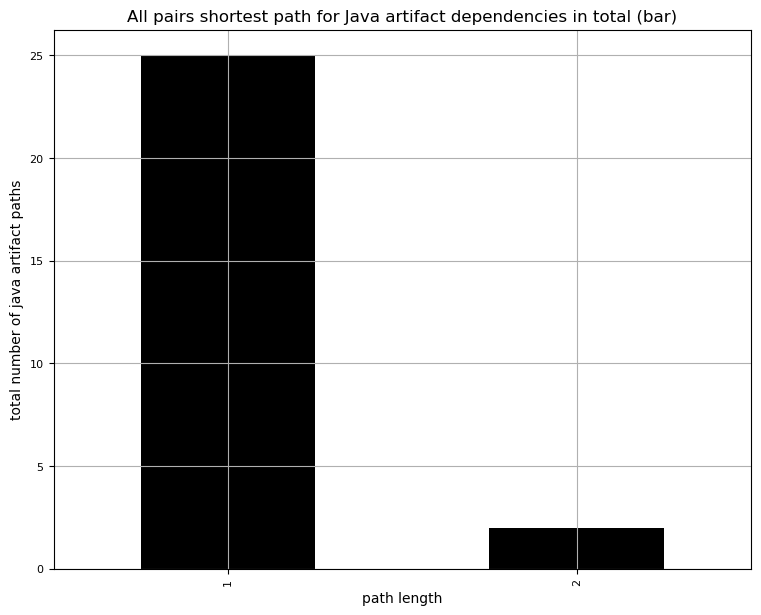

In [55]:
plot_total_distances_bar_chart(
    data_frame=all_pairs_shortest_paths_distribution_for_artifacts, 
    title='All pairs shortest path for Java artifact dependencies in total (bar)',
    ylabel='total number of java artifact paths'
)

#### All pairs shortest path in total - Path count per length - Bar chart

<Figure size 640x480 with 0 Axes>

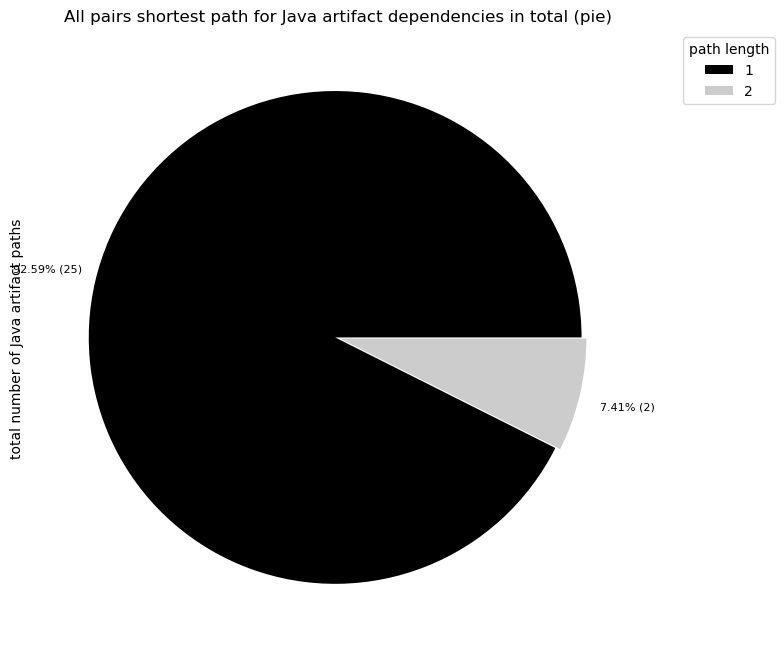

In [56]:
plot_total_distances_pie_chart(
    data_frame=all_pairs_shortest_paths_distribution_for_artifacts,
    title='All pairs shortest path for Java artifact dependencies in total (pie)',
    ylabel='total number of Java artifact paths'
)

## 2.2 Longest path

Use [Longest Path](https://neo4j.com/docs/graph-data-science/current/algorithms/dag/longest-path) algorithm to get the longest paths between Java artifacts. This is especially interesting because an artifact can only be built when the artifacts it depends on are built (and published). The longest path shows in this case the total/max. number of build levels that are needed in case everything needs to be rebuild ("worst case"). Its also an interesting metric for complexity. It is typically higher than the longest shortest path (diameter) and helps together with it to get a good overview of the complexity.

**Note:** This algorithm requires a Directed Acyclic Graph (DAG) and might lead to inaccurate results when the Graph contains cycles.

### 2.2.1 Longest path in total

First, we'll have a look at the overall/total result of the longest path algorithm for all dependencies.

In [57]:
# Execute algorithm "longest path (for directed acyclic graphs)" and query overall and artifact specific results
longest_artifact_paths_distribution=query_if_data_available(is_package_data_available, "../cypher/Path_Finding/Path_Finding_6_Longest_paths_distribution_per_project.cypher", artifact_path_finding_parameters)

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownPropertyKeyWarning} {category: UNRECOGNIZED} {title: The provided property key is not in the database} {description: One of the property names in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing property name is: rootProjectName)} {position: line: 36, column: 42, offset: 2007} for query: "// Longest paths distribution\n \n   CALL gds.dag.longestPath.stream($dependencies_projection + '-cleaned')\n  YIELD index, sourceNode, targetNode, totalCost//, nodeIds, costs, path\n   WITH toInteger(totalCost) AS distance\n       ,sourceNode           AS sourceNodeId\n       ,targetNode           AS targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group by distance to get the overall distribution\n   WITH distance\n       ,count(*)   

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownPropertyKeyWarning} {category: UNRECOGNIZED} {title: The provided property key is not in the database} {description: One of the property names in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing property name is: rootProjectName)} {position: line: 36, column: 16, offset: 1981} for query: "// Longest paths distribution\n \n   CALL gds.dag.longestPath.stream($dependencies_projection + '-cleaned')\n  YIELD index, sourceNode, targetNode, totalCost//, nodeIds, costs, path\n   WITH toInteger(totalCost) AS distance\n       ,sourceNode           AS sourceNodeId\n       ,targetNode           AS targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group by distance to get the overall distribution\n   WITH distance\n       ,count(*)   

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownRelationshipTypeWarning} {category: UNRECOGNIZED} {title: The provided relationship type is not in the database.} {description: One of the relationship types in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing relationship type is: CONTAINS_PROJECT)} {position: line: 29, column: 39, offset: 1524} for query: "// Longest paths distribution\n \n   CALL gds.dag.longestPath.stream($dependencies_projection + '-cleaned')\n  YIELD index, sourceNode, targetNode, totalCost//, nodeIds, costs, path\n   WITH toInteger(totalCost) AS distance\n       ,sourceNode           AS sourceNodeId\n       ,targetNode           AS targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group by distance to get the overall distribution\n   WITH distance\

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownPropertyKeyWarning} {category: UNRECOGNIZED} {title: The provided property key is not in the database} {description: One of the property names in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing property name is: rootProjectName)} {position: line: 33, column: 15, offset: 1786} for query: "// Longest paths distribution\n \n   CALL gds.dag.longestPath.stream($dependencies_projection + '-cleaned')\n  YIELD index, sourceNode, targetNode, totalCost//, nodeIds, costs, path\n   WITH toInteger(totalCost) AS distance\n       ,sourceNode           AS sourceNodeId\n       ,targetNode           AS targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group by distance to get the overall distribution\n   WITH distance\n       ,count(*)   

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownRelationshipTypeWarning} {category: UNRECOGNIZED} {title: The provided relationship type is not in the database.} {description: One of the relationship types in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing relationship type is: CONTAINS_PROJECT)} {position: line: 28, column: 39, offset: 1451} for query: "// Longest paths distribution\n \n   CALL gds.dag.longestPath.stream($dependencies_projection + '-cleaned')\n  YIELD index, sourceNode, targetNode, totalCost//, nodeIds, costs, path\n   WITH toInteger(totalCost) AS distance\n       ,sourceNode           AS sourceNodeId\n       ,targetNode           AS targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group by distance to get the overall distribution\n   WITH distance\

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.AggregationSkippedNull} {category: UNRECOGNIZED} {title: The query contains an aggregation function that skips null values.} {description: null value eliminated in set function.} {position: None} for query: "// Longest paths distribution\n \n   CALL gds.dag.longestPath.stream($dependencies_projection + '-cleaned')\n  YIELD index, sourceNode, targetNode, totalCost//, nodeIds, costs, path\n   WITH toInteger(totalCost) AS distance\n       ,sourceNode           AS sourceNodeId\n       ,targetNode           AS targetNodeId\n  WHERE sourceNodeId  <> targetNodeId // Filter out cyclic dependencies\n // Group by distance to get the overall distribution\n   WITH distance\n       ,count(*)                     AS distanceTotalPairCount\n       ,count(DISTINCT sourceNodeId) AS distanceTotalSourceCount\n       ,count(DISTINCT targetNodeId) AS distanceTotalTargetCount\n       ,collect({sourceNodeId: so

#### Longest path in total - Max longest path

In [58]:
artifact_dependencies_max_longest_path=longest_artifact_paths_distribution['distance'].max()
print('The max. longest path of the projected artifact dependencies is:', artifact_dependencies_max_longest_path)

The max. longest path of the projected artifact dependencies is: 6


#### Longest path in total - Path count per length - Table

In [59]:
# First, display only the overall/total distances, their pair count and the count of the distinct source and target nodes
longest_artifact_paths_distribution_per_artifact_in_total=get_total_distance_distribution(longest_artifact_paths_distribution)
longest_artifact_paths_distribution_per_artifact_in_total.head(50)

,index,distance,distanceTotalPairCount,distanceTotalSourceCount,distanceTotalTargetCount
0,0,1,3,1,3
1,1,2,1,1,1
2,2,3,1,1,1
3,3,4,1,1,1
4,4,5,1,1,1
5,5,6,1,1,1


#### Longest path in total - Path count per length - Bar chart

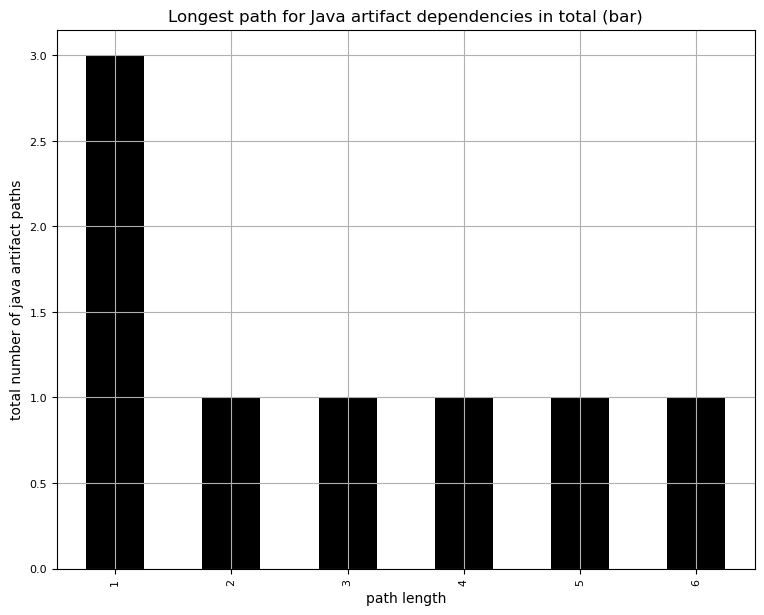

In [60]:
plot_total_distances_bar_chart(
    data_frame=longest_artifact_paths_distribution_per_artifact_in_total, 
    title='Longest path for Java artifact dependencies in total (bar)',
    ylabel='total number of java artifact paths'
)

#### Longest path in total - Path count per length - Pie chart

<Figure size 640x480 with 0 Axes>

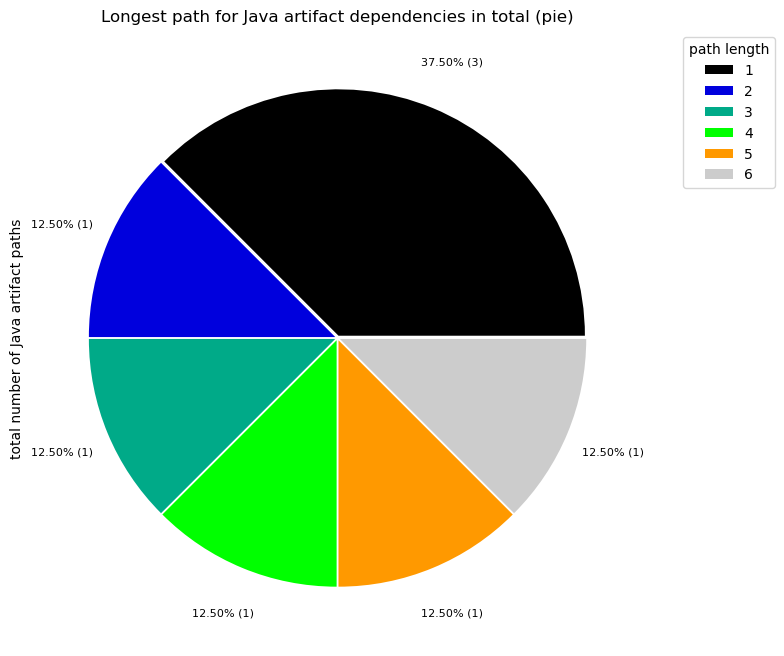

In [61]:
plot_total_distances_pie_chart(
    data_frame=longest_artifact_paths_distribution_per_artifact_in_total,
    title='Longest path for Java artifact dependencies in total (pie)',
    ylabel='total number of Java artifact paths'
)

## 3. Summary

### 3.1 Java packages summary

In [62]:
package_path_algorithm_summary_values = {
    'count': package_projection_statistics.nodeCount[0] if not package_projection_statistics.empty else 0, 
    'degree density': package_projection_statistics.density[0] if not package_projection_statistics.empty else 0.0, 
    'degree median': package_projection_statistics['degreeDistribution.p50'][0] if not package_projection_statistics.empty else 0,
    'degree max': package_projection_statistics['degreeDistribution.max'][0] if not package_projection_statistics.empty else 0,
    'longest shortest path (diameter)': package_dependencies_graph_diameter,
    'max. longest path': package_dependencies_max_longest_path
}
package_path_algorithm_summary = pd.DataFrame.from_records([package_path_algorithm_summary_values])
package_path_algorithm_summary

,count,degree density,degree median,degree max,longest shortest path (diameter),max. longest path
0,116,0.056972,5,58,5,5


### 3.2 Java artifacts summary

In [63]:
artifact_path_algorithm_summary_values = {
    'count': artifact_projection_statistics.nodeCount[0] if not artifact_projection_statistics.empty else 0,
    'degree density': artifact_projection_statistics.density[0] if not artifact_projection_statistics.empty else 0, 
    'degree median': artifact_projection_statistics['degreeDistribution.p50'][0] if not artifact_projection_statistics.empty else 0,
    'degree max': artifact_projection_statistics['degreeDistribution.max'][0] if not artifact_projection_statistics.empty else 0,
    'longest shortest path (diameter)': artifact_dependencies_graph_diameter,
    'max. longest path': artifact_dependencies_max_longest_path
}
artifact_path_algorithm_summary = pd.DataFrame.from_records([artifact_path_algorithm_summary_values])
artifact_path_algorithm_summary

,count,degree density,degree median,degree max,longest shortest path (diameter),max. longest path
0,9,0.347222,3,7,2,6
